In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import api_key


In [2]:
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ["CEU1000000001", "CEU2000000001", "CEU3100000001", "CEU3200000001", "CEU4100000001", "CEU4200000001", "CEU4300000001", "CEU5000000001", "CEU5500000001", "CEU6000000001", "CEU6500000001", "CEU7000000001"], "startyear":"2011", "endyear":"2019" ,"registrationkey":api_key })
p = requests.post(url, data=data, headers=headers).json()
p

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 738,
 'message': ['Series does not exist for Series CEU4100000001'],
 'Results': {'series': [{'seriesID': 'CEU1000000001',
    'data': [{'year': '2019',
      'period': 'M12',
      'periodName': 'December',
      'value': '693',
      'footnotes': [{}]},
     {'year': '2019',
      'period': 'M11',
      'periodName': 'November',
      'value': '711',
      'footnotes': [{}]},
     {'year': '2019',
      'period': 'M10',
      'periodName': 'October',
      'value': '727',
      'footnotes': [{}]},
     {'year': '2019',
      'period': 'M09',
      'periodName': 'September',
      'value': '725',
      'footnotes': [{}]},
     {'year': '2019',
      'period': 'M08',
      'periodName': 'August',
      'value': '733',
      'footnotes': [{}]},
     {'year': '2019',
      'period': 'M07',
      'periodName': 'July',
      'value': '737',
      'footnotes': [{}]},
     {'year': '2019',
      'period': 'M06',
      'periodName': 'June',
   

In [3]:
mining = []
construction = []
durable_goods = []
non_durable_goods = []
retail = []
transportation = []
information = []
financial_activities = []
professional_and_business = []
education_and_health = []
leisure_and_hospitality = []

dates = []
#months= []
s_mining = p['Results']['series'][0]['data']
s_construction = p['Results']['series'][1]['data']
s_durable_goods = p['Results']['series'][2]['data']
s_non_durable_goods = p['Results']['series'][3]['data']
s_retail = p['Results']['series'][5]['data']
s_transportation = p['Results']['series'][6]['data']
s_information = p['Results']['series'][7]['data']
s_financial = p['Results']['series'][8]['data']
s_profesional = p['Results']['series'][9]['data']
s_education_health = p['Results']['series'][10]['data']
s_hospitality = p['Results']['series'][11]['data']

for x in range(0,len(s_mining)):
    value_mining = s_mining[x]['value']
    value_construction = s_construction[x]['value']
    value_durable_goods = s_durable_goods[x]['value']
    value_non_durable_goods = s_non_durable_goods[x]['value']
    value_retail = s_retail[x]['value']
    value_transportation = s_transportation[x]['value']
    value_information = s_information[x]['value']
    value_financial = s_financial[x]['value']
    value_professional = s_profesional[x]['value']
    value_edu_health = s_education_health[x]['value']
    value_hospitality = s_hospitality[x]['value']
    
    
    period = s_mining[x]['period']
    date = s_mining[x]['year'] + '-' + period[1:]
    
    mining.append(value_mining)
    construction.append(value_construction)
    durable_goods.append(value_durable_goods)
    non_durable_goods.append(value_non_durable_goods)
    retail.append(value_retail)
    transportation.append(value_transportation)
    information.append(value_information)
    financial_activities.append(value_financial)
    professional_and_business.append(value_professional)
    education_and_health.append(value_edu_health)
    leisure_and_hospitality.append(value_hospitality)
    
    
    dates.append(date)
    #months.append(period[1:])
    

In [4]:
employees = pd.DataFrame({'Date': dates, 'Mining': mining, 'Construction': construction,
                         'Durable_goods': durable_goods, 'Non_durable_goods': non_durable_goods, 'Retail': retail,
                         'Transportation': transportation, 'Information': information, 'Financial_activities': financial_activities,
                         'Professional_and_business_activities': professional_and_business, 'Education_and_health': education_and_health,
                         'Leisure_and_hospitality': leisure_and_hospitality})
employees = employees.sort_values('Date', ascending=True)

In [5]:
employees.dtypes

Date                                    object
Mining                                  object
Construction                            object
Durable_goods                           object
Non_durable_goods                       object
Retail                                  object
Transportation                          object
Information                             object
Financial_activities                    object
Professional_and_business_activities    object
Education_and_health                    object
Leisure_and_hospitality                 object
dtype: object

In [6]:
employees.columns

Index(['Date', 'Mining', 'Construction', 'Durable_goods', 'Non_durable_goods',
       'Retail', 'Transportation', 'Information', 'Financial_activities',
       'Professional_and_business_activities', 'Education_and_health',
       'Leisure_and_hospitality'],
      dtype='object')

In [7]:
employees['Mining'] = employees['Mining'].astype('float')
employees['Construction'] = employees['Construction'].astype('float')
employees['Durable_goods'] = employees['Durable_goods'].astype('float')
employees['Non_durable_goods'] = employees['Non_durable_goods'].astype('float')
employees['Retail'] = employees['Retail'].astype('float')
employees['Transportation'] = employees['Transportation'].astype('float')
employees['Information'] = employees['Information'].astype('float')
employees['Financial_activities'] = employees['Financial_activities'].astype('float')
employees['Professional_and_business_activities'] = employees['Professional_and_business_activities'].astype('float')
employees['Education_and_health'] = employees['Education_and_health'].astype('float')
employees['Leisure_and_hospitality'] = employees['Leisure_and_hospitality'].astype('float')


employees.dtypes

Date                                     object
Mining                                  float64
Construction                            float64
Durable_goods                           float64
Non_durable_goods                       float64
Retail                                  float64
Transportation                          float64
Information                             float64
Financial_activities                    float64
Professional_and_business_activities    float64
Education_and_health                    float64
Leisure_and_hospitality                 float64
dtype: object

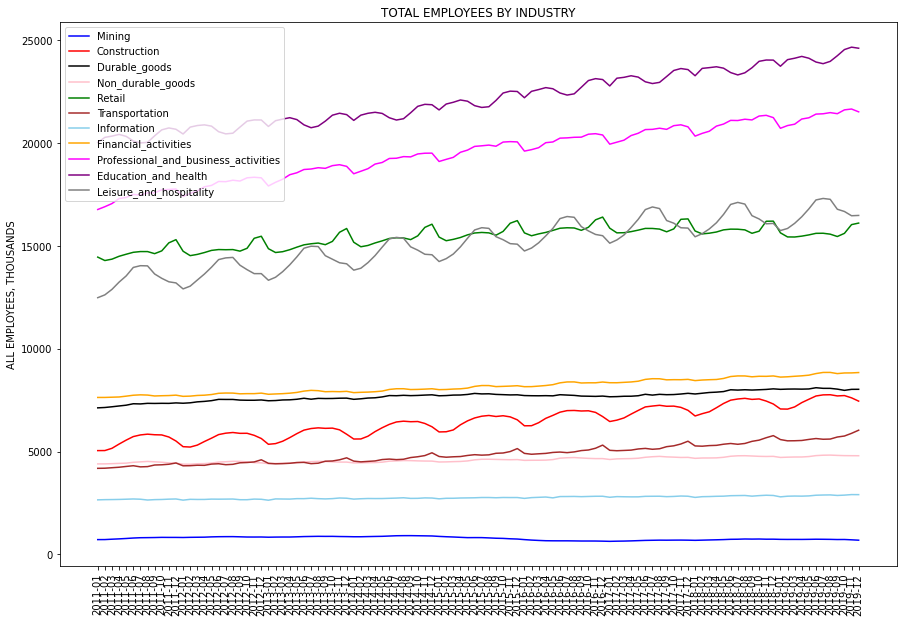

In [8]:
plt.figure(figsize=(15,10))
plt.plot(employees['Date'], employees['Mining'], color='blue', label='Mining')
plt.plot(employees['Date'], employees['Construction'], color='red', label='Construction')
plt.plot(employees['Date'], employees['Durable_goods'], color='black', label='Durable_goods')
plt.plot(employees['Date'], employees['Non_durable_goods'], color='pink', label='Non_durable_goods')
plt.plot(employees['Date'], employees['Retail'], color='green', label='Retail')
plt.plot(employees['Date'], employees['Transportation'], color='brown', label='Transportation')
plt.plot(employees['Date'], employees['Information'], color='skyblue', label='Information')
plt.plot(employees['Date'], employees['Financial_activities'], color='orange', label='Financial_activities')
plt.plot(employees['Date'], employees['Professional_and_business_activities'], color='magenta', label='Professional_and_business_activities')
plt.plot(employees['Date'], employees['Education_and_health'], color='purple', label='Education_and_health')
plt.plot(employees['Date'], employees['Leisure_and_hospitality'], color='gray', label='Leisure_and_hospitality')
plt.xticks(rotation=90)
plt.title('TOTAL EMPLOYEES BY INDUSTRY')
plt.ylabel('ALL EMPLOYEES, THOUSANDS')
plt.legend(loc='upper left')

In [13]:
employees.to_csv("Output/un201119.csv", index=False, header=True)